In [177]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
print(cv2.__version__)

4.4.0


In [179]:
def plot_images(img1,img2,title="",title2=''):
    fig=plt.figure(figsize=[15,15])
    ax1=fig.add_subplot(121)
    ax1.imshow(img1 ,cmap="gray")
    ax1.set(xticks=[], yticks=[],title=title)
    
    ax2=fig.add_subplot(122)
    ax2.imshow(img2 ,cmap="gray")
    ax2.set(xticks=[], yticks=[],title=title)

In [180]:
path = "./download.jpeg"

In [181]:
image = cv2.imread(path)


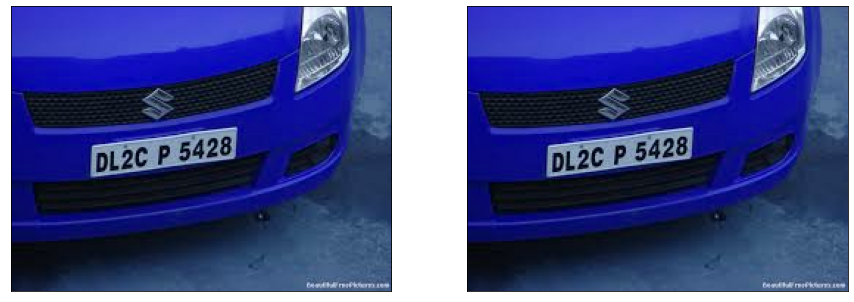

In [182]:

plot_images(image, image,)

In [183]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

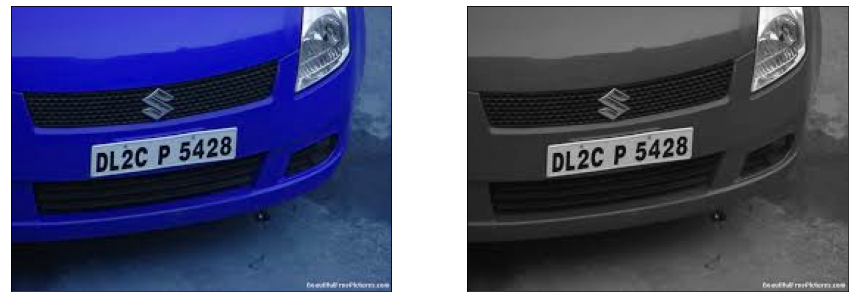

In [184]:
plot_images(image,gray)


In [185]:
blur=cv2.bilateralFilter(gray,11,90,90)

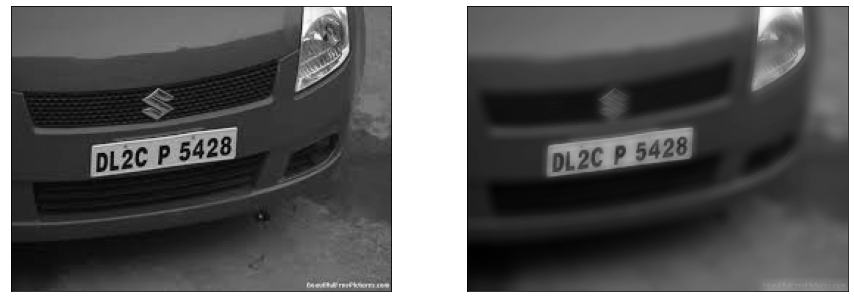

In [186]:
plot_images(gray,blur)



In [187]:
edges=cv2.Canny(blur,30,200)

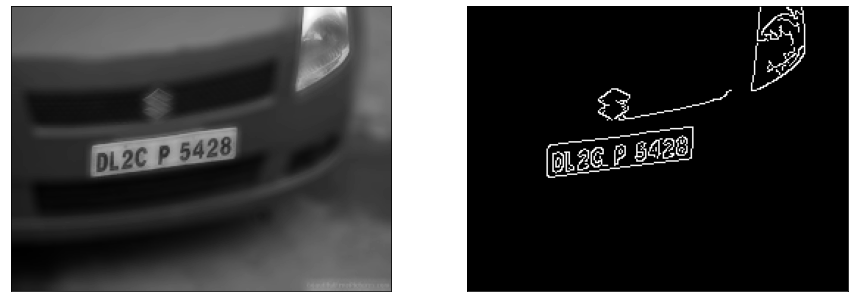

In [188]:
plot_images(blur,edges)

In [189]:
cnts, new=cv2.findContours(edges.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [190]:
image_copy=image.copy()

In [191]:
_=cv2.drawContours(image_copy,cnts,-1,(255,0,255),2)

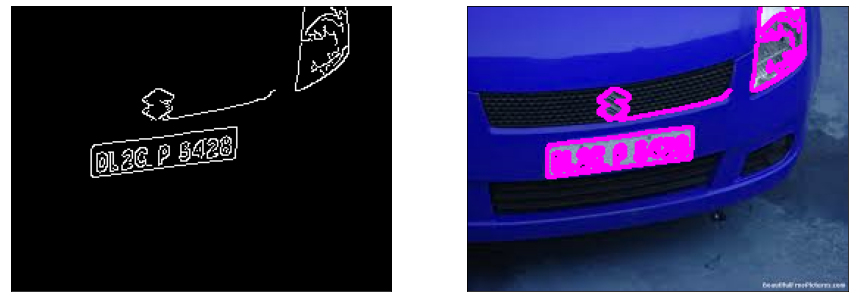

In [192]:
plot_images(edges,image_copy)

In [193]:
print(len(cnts))

34


In [194]:
cnts=sorted(cnts,key=cv2.contourArea,reverse=True)[:30]


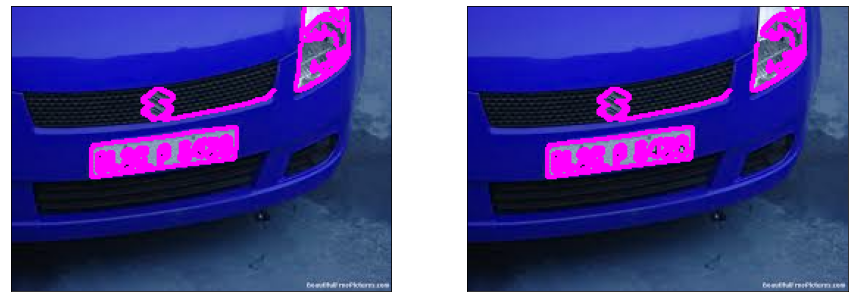

In [195]:
image_reduced_cnts=image.copy()
_=cv2.drawContours(image_reduced_cnts,cnts,-1,(255,0,255),2)
plot_images(image_copy,image_reduced_cnts,)

In [196]:
print(len(cnts))

30


In [197]:
plate=None
for c in cnts:
    perimeter=cv2.arcLength(c,True)
    edges_count=cv2.approxPolyDP(c,0.02*perimeter,True)
    if len(edges_count)==4:
        x,y,w,h=cv2.boundingRect(c)
        plate=image[y:y+h,x:x+w]
        break
        
cv2.imwrite("plate.png",plate)

True

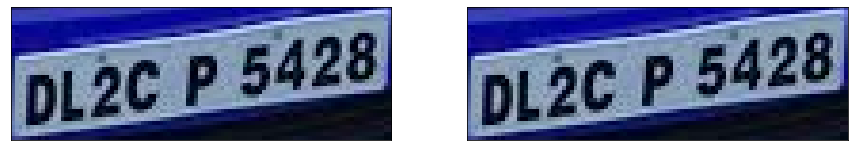

In [198]:
plot_images(plate,plate)

In [199]:
import pytesseract
text=pytesseract.image_to_string(plate,lang="eng")

print(text)
